In [1]:
import seaborn as sns
sns.set()



In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd


import string

def count_characters(input_str):
    letters = 0
    digits = 0
    punctuation = 0
    
    for char in input_str:
        if char.isalpha():
            letters += 1
        elif char.isdigit():
            digits += 1
        elif char in string.punctuation:
            punctuation += 1
    
    return letters, digits, punctuation

#######################################################################################

df_list = []

for i in range(11):
    gen_list = []
    for gen in ["I", "II", "III","IV", "V"]:
        file = open('text_stats/stats_gen_'+str(i)+'_'+gen+'.pickle', 'rb')
        df = pickle.load(file)

        df["letters"] = df["doc"].apply(lambda d: count_characters(d)[0])
        df["digits"] = df["doc"].apply(lambda d: count_characters(d)[1])
        df["punctuation"] = df["doc"].apply(lambda d: count_characters(d)[2])

        dfmean = df.mean(numeric_only=True)
        dfmean = dfmean.drop("id")

        gen_list.append(dfmean)
        file.close()
    epoch_df = pd.concat(gen_list, axis=1).T
    df_list.append(epoch_df)




In [ ]:
len(df_list)

11

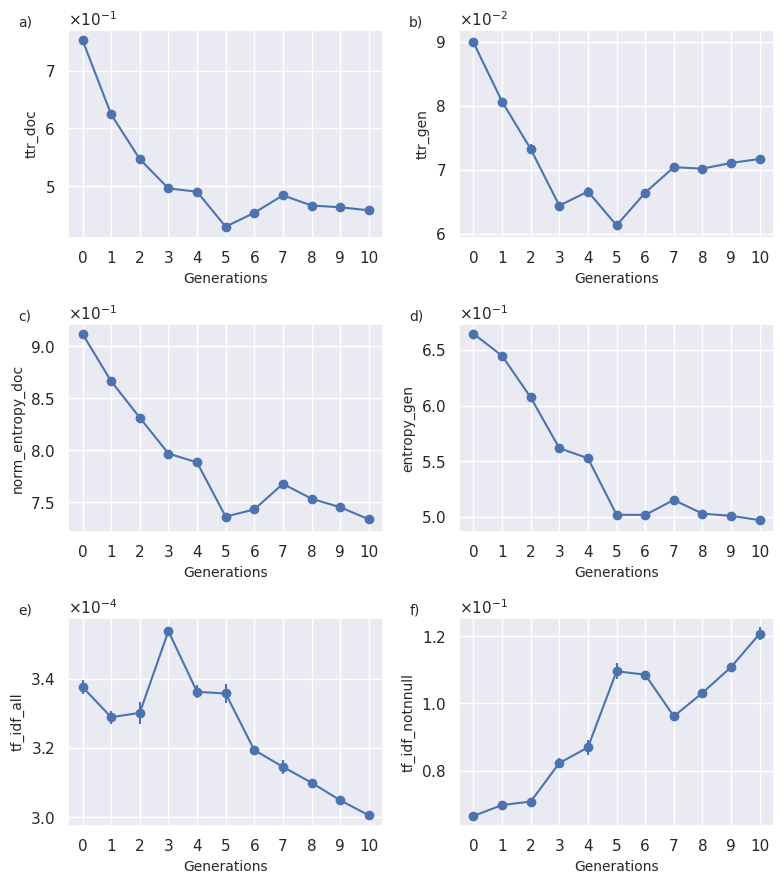

In [ ]:

import matplotlib.ticker as ticker
import math

from matplotlib import transforms



fig, axs = plt.subplots(3, 2, figsize=(8, 9))

scaledtrans = transforms.ScaledTranslation(-0.5, 0, fig.dpi_scale_trans)


list_metric= ["ttr_doc", "ttr_gen" , "norm_entropy_doc", "entropy_gen", "tf_idf_all", "tf_idf_notnnull"]

labels = ["a)", "b)", "c)", "d)", "e)", "f)" ]

label_metric = {"proportion_unique_tokens":"PUT_Spacy",
                 "norm_entropy_doc": "Entropy_Doc" ,
                   "ttr_doc":"TTR", 
                   "entropy_gen": "entropy_gen"}


for i in range(6):
  metric = list_metric[i]

  j,k = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)][i]

  x = range(11)
  y = [df[metric].mean() for df in df_list]
  e =  [df[metric].var() for df in df_list]



#  axs[j,k].plot(y, marker="o", label="Generation k")
  axs[j,k].text(0, 1, labels[i], fontsize=10, fontweight="normal", va="bottom", ha="left",
           transform=axs[j,k].transAxes + scaledtrans)
  axs[j,k].errorbar(x, y, e, fmt="-o")  
  
 # axs[j,k].legend(loc= "center right")

  if j == 2:
    axs[j,k].set_xlabel("Generations", size=10)
  axs[j,k].set_ylabel(metric, size=10)

  axs[j,k].set_xticks(range(11))

  axs[j,k].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
  axs[j,k].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
  axs[j,k].set_xlabel("Generations", size=10)


plt.tight_layout()

plt.savefig("img/stats2.pdf", format="pdf", bbox_inches="tight")
plt.show()


